In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve, auc
from sklearn.metrics import roc_auc_score

# # 1. Load and Explore the Data

In [ ]:
df = pd.read_csv('/content/heart.csv')

In [ ]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [ ]:
df.shape

(1025, 14)

In [ ]:
df['target'].value_counts()

,count
target,
1,526
0,499


In [17]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.0

In [18]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


# # 2. Data Visualization

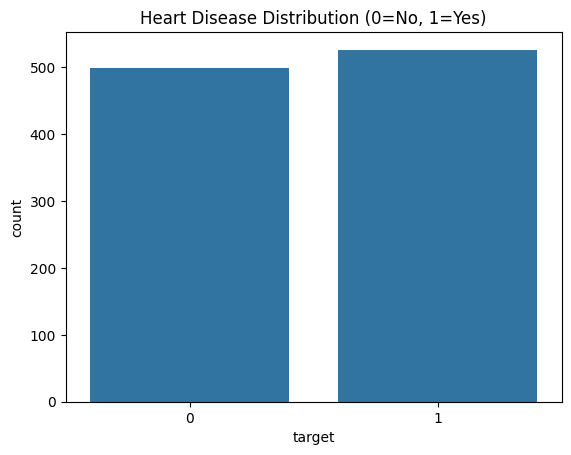

In [19]:
sns.countplot(x='target', data=df)
plt.title('Heart Disease Distribution (0=No, 1=Yes)')
plt.show()

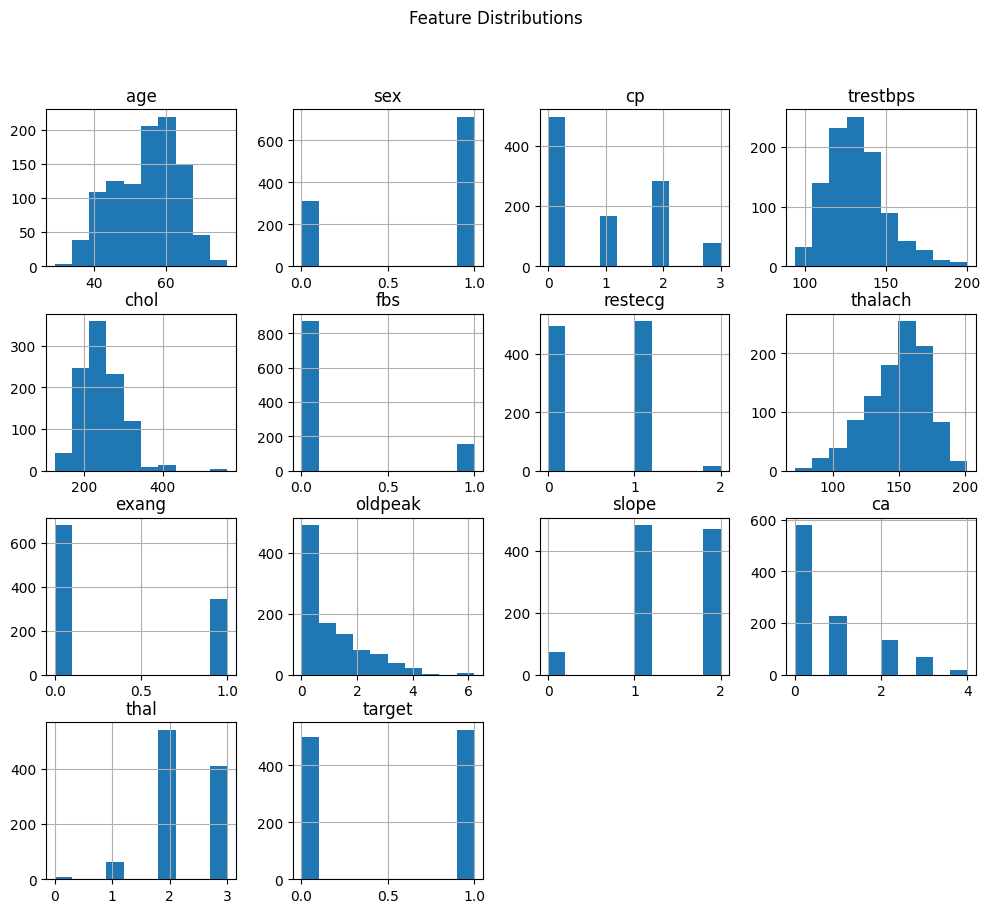

In [20]:
df.hist(figsize=(12, 10))
plt.suptitle('Feature Distributions')
plt.show()

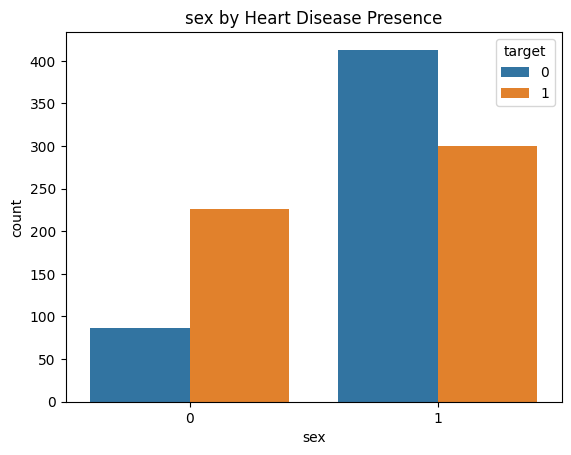

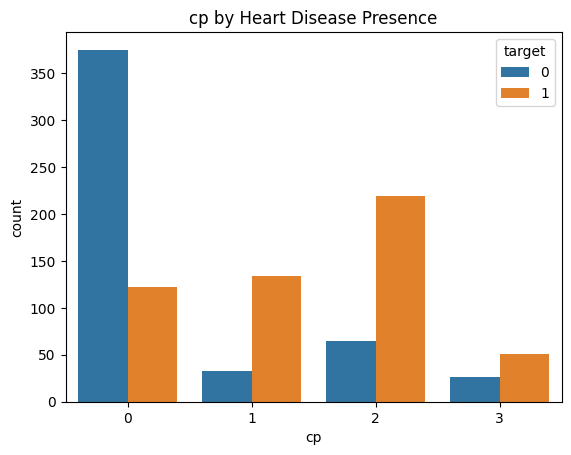

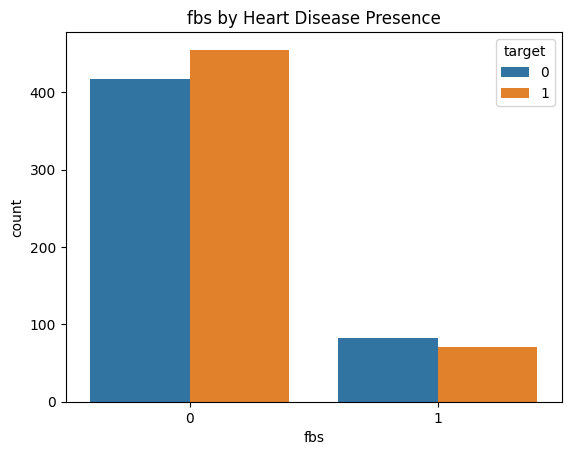

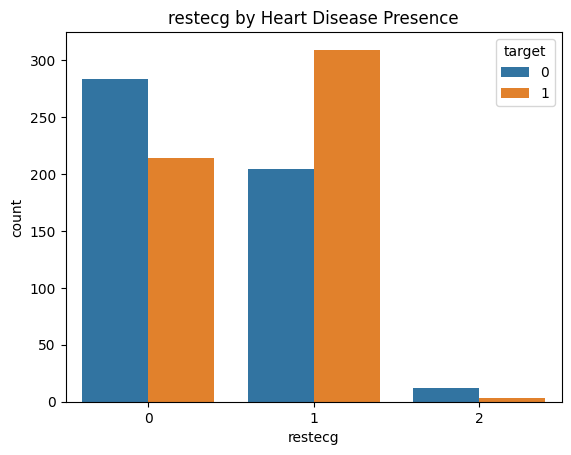

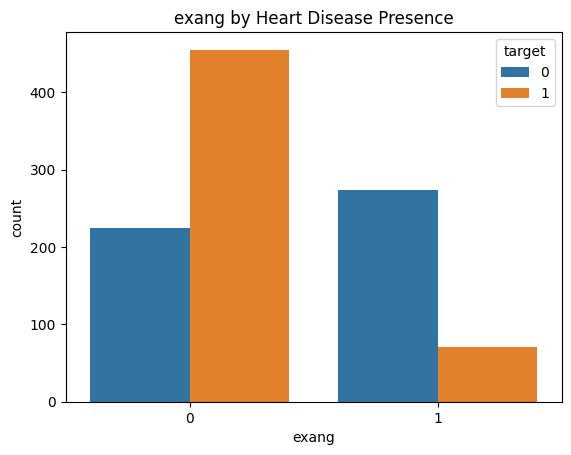

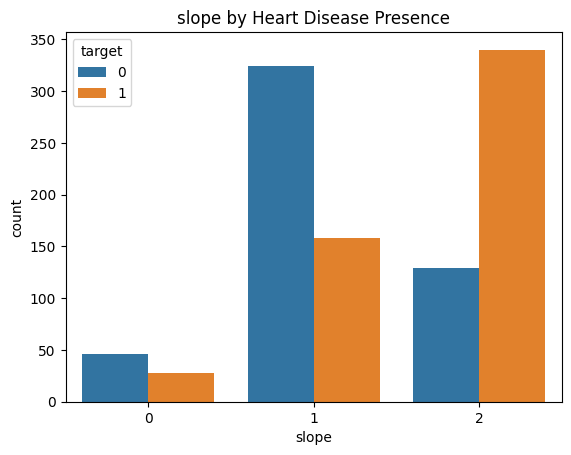

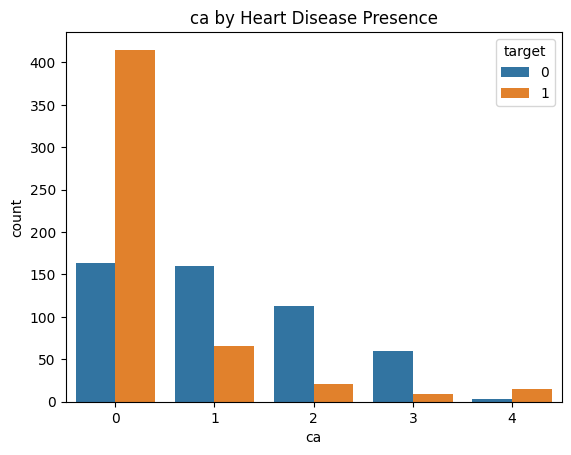

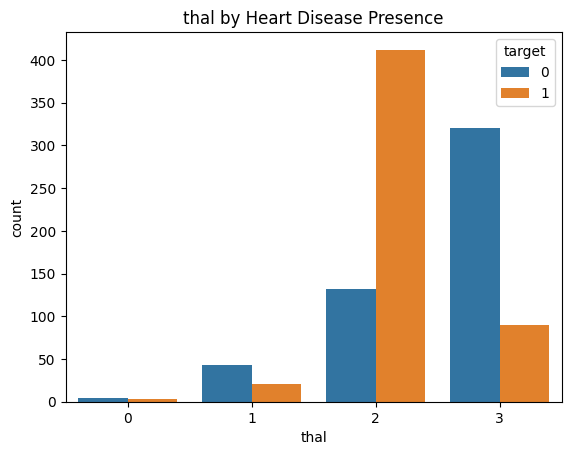

In [21]:
categorical = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for col in categorical:
    sns.countplot(x=col, hue='target', data=df)
    plt.title(f'{col} by Heart Disease Presence')
    plt.show()

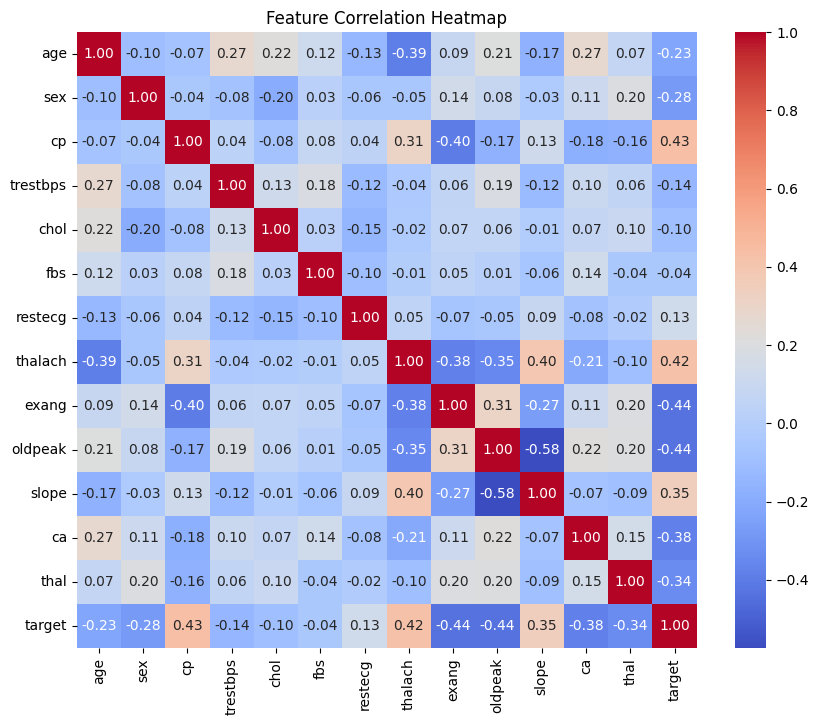

In [22]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Feature Correlation Heatmap')
plt.show()

# # 3. Preprocess Data and Train Model

In [ ]:
X= df.iloc[:,0:13]
y = df.iloc[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# # 4. Evaluate the Model

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9853658536585366

Confusion Matrix:
[[100   0]
 [  3 102]]


In [ ]:
y_pre = model.predict(X_train)
print("Accuracy:", accuracy_score(y_train, y_pre))
print("\nConfusion Matrix:")
print(confusion_matrix(y_train, y_pre))

Accuracy: 1.0

Confusion Matrix:
[[399   0]
 [  0 421]]


In [ ]:
y_proba = model.predict_proba(X_test)[:, 1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

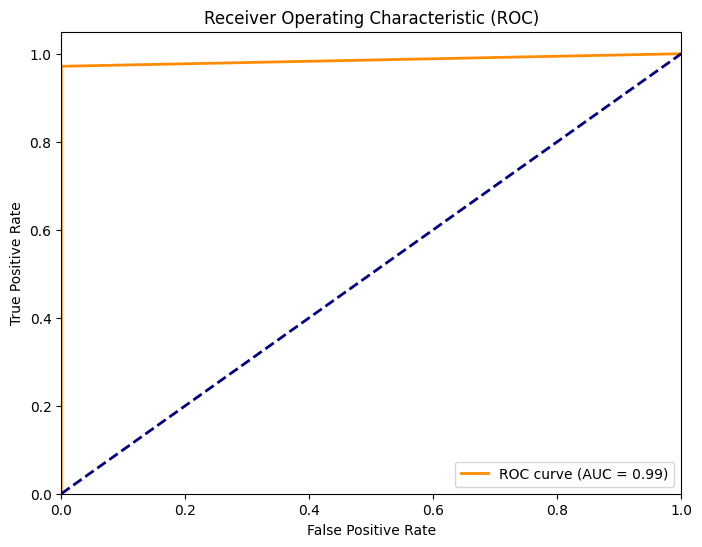

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# # 5. Feature Importance Visualization

In [ ]:
importances = pd.Series(model.feature_importances_, index=X.columns)

# Sort importances in descending order
importances_sorted = importances.sort_values(ascending=False)

# Print feature importances
print("Feature Importances:\n", importances_sorted)

Feature Importances:
 cp          0.299922
ca          0.128631
age         0.114920
chol        0.099451
thal        0.079146
oldpeak     0.054481
trestbps    0.051820
thalach     0.043466
slope       0.038558
sex         0.035869
exang       0.032445
restecg     0.021291
fbs         0.000000
dtype: float64


/tmp/ipython-input-15-2105426365.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_sorted, y=importances_sorted.index, palette="viridis")


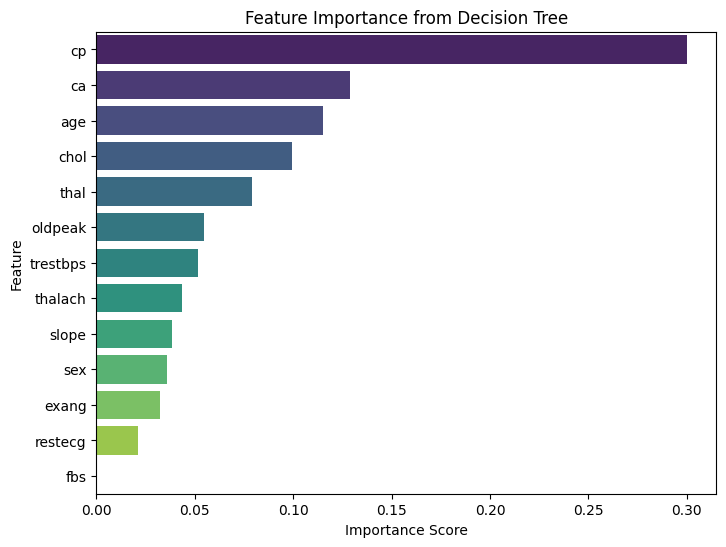

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=importances_sorted, y=importances_sorted.index, palette="viridis")
plt.title("Feature Importance from Decision Tree")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()